#### 1) 최근접 이웃 알고리즘의 개요

In [1]:
#지도학습

from sklearn.neighbors import KNeighborsClassifier



X = [[0], [1], [2], [3]]  

y = [0, 0, 1, 1]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

#1.1의 분류는?

print(knn.predict([[1.1]])) # 0으로 분류됨

#0.9는 0일 확률 66%, 1일 확률 33% => 0으로 분류됨

print(knn.predict_proba([[0.9]]))

print(knn.predict([[0.9]]))

[0]
[[0.66666667 0.33333333]]
[0]


In [2]:
#########################################################

#비지도학습

from sklearn.neighbors import NearestNeighbors

samples = [[0, 0, 0], [0, 0.5, 0], [1, 1, 0.2]]

nn = NearestNeighbors(n_neighbors=1)

nn.fit(samples)

#새로운 데이터 1,1,1에 가장 가까운 데이터는?

print(nn.kneighbors([[1., 1., 1.]]))

# 세번째와 가장 가깝고 거리는 0.8

(array([[0.8]]), array([[2]], dtype=int64))


In [3]:
#최근접 이웃 회귀모형

from sklearn.neighbors import KNeighborsRegressor

X = [[40], [45], [60], [70]] #평방미터

y = [20, 22, 30, 35] #월세

neigh = KNeighborsRegressor(n_neighbors=2)

neigh.fit(X, y)

# 65평방미터일 때의 월세는?

print(neigh.predict([[65]]))

print(neigh.predict(X))

[32.5]
[21.  21.  32.5 32.5]


#### 2) forge 데이터셋(무작위 데이터셋)

(26, 2)
[1 0 1 0 1 0]
0.8333333333333334


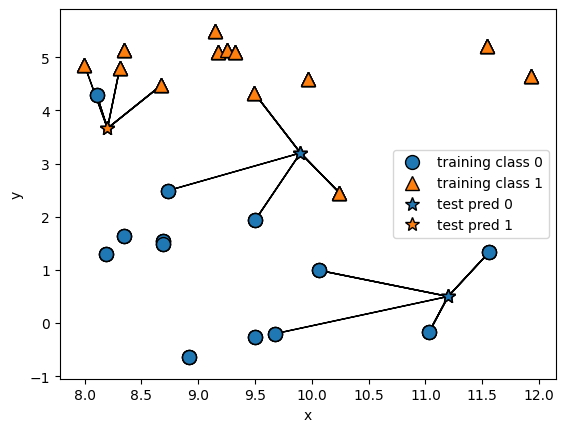

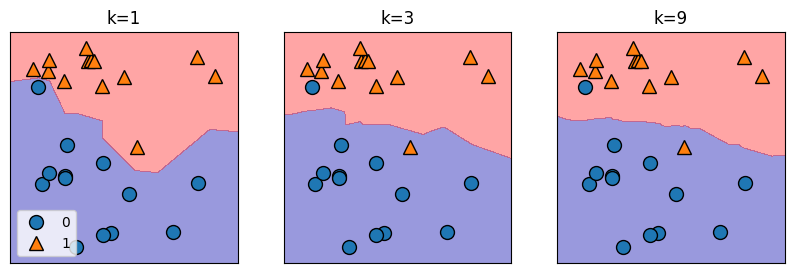

In [4]:
from matplotlib import pyplot as plt

import mglearn

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["class 0", "class 1"], loc=4)

plt.xlabel("x")

plt.ylabel("y")

print(X.shape)

#########################################################

# 1개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=1)

#########################################################

# 2개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=2)

#########################################################

# 3개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=3)

#########################################################

# 4개의 이웃

mglearn.plots.plot_knn_classification(n_neighbors=4)

#########################################################

from sklearn.model_selection import train_test_split

#데이터셋 분리

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#########################################################

#3개의 이웃

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# 데이터 학습

knn.fit(X_train, y_train)

print(knn.predict(X_test))

print(knn.score(X_test, y_test))

#########################################################

#1행 3열의 서브플롯

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):

    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)

    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=0.4)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    ax.set_title(f'k={n}')

    

axes[0].legend(loc=3)

# k=1 : 학습용 데이터에 가깝게 따라감

# 이웃의 수를 늘릴수록 결정경계는 더 부드러워짐

# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다.

#### 3) 유사도(거리) 계산 방법

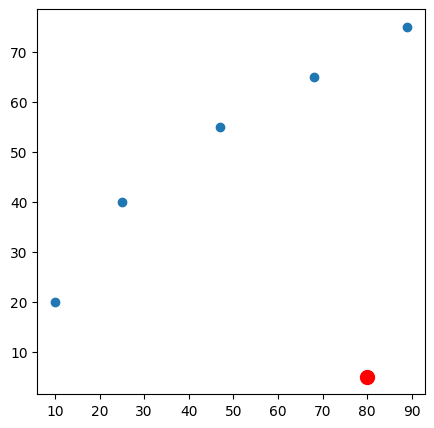

In [5]:
import matplotlib.pyplot as plt

X=[10,25,47,68,89]

y=[20,40,55,65,75]

plt.figure(figsize=(5,5))

plt.scatter(X,y)

mypoint=(80,5)

plt.scatter(mypoint[0],mypoint[1],s=100,c='r')

#mypoint와 가장 가까운 포인트는?

In [6]:
#a,b의 유클리드 거리 구하기

from math import sqrt

import numpy as np

def distance(p, m):

    items=[]

    for i in range(len(p-1)):

        d = sqrt((m[0] - p[i][0])**2 + (m[1] - p[i][1])**2)

        items.append(d)

    return items

points=np.array(list(zip(X,y)))

r=distance( points, mypoint )

print(r)

m=min(r)

i=np.argmin(r)

print('가장 가까운 포인트의 인덱스:',i)

print('가장 가까운 포인트는?',points[i])

[71.58910531638176, 65.19202405202648, 59.90826320300064, 61.18823416311342, 70.57619995437555]
가장 가까운 포인트의 인덱스: 2
가장 가까운 포인트는? [47 55]


In [7]:
#########################################################

#사이파이 패키지에 내장된 유클리드 거리 함수

from scipy.spatial import distance

results=[]

for point in points:

    dist = distance.euclidean(point, mypoint)

    results.append(dist)

    

results  

[71.58910531638176,
 65.19202405202648,
 59.90826320300064,
 61.18823416311342,
 70.57619995437555]

In [8]:
#X,y의 맨해튼 거리 구하기

def distance(p, m):

    items=[]

    for i in range(len(p-1)):

        d = abs(m[0] - p[i][0]) + abs(m[1] - p[i][1])

        items.append(d)

    return items

r=distance( points, mypoint )

print(r)

m=min(r)

i=np.argmin(r)

print('가장 가까운 포인트의 인덱스:',i)

print('가장 가까운 포인트는?',points[i])

#사이파이 패키지에 내장된 맨해튼 거리를 구하는 함수

from scipy.spatial import distance

results=[]

for point in points:

    dist = distance.cityblock(point, mypoint)

    results.append(dist)

    

results   

[85, 90, 83, 72, 79]
가장 가까운 포인트의 인덱스: 3
가장 가까운 포인트는? [68 65]


[85, 90, 83, 72, 79]

#### 4) 오존량 예측

In [9]:
import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("../DATA/ozone2.csv")

df.head()

#########################################################

df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

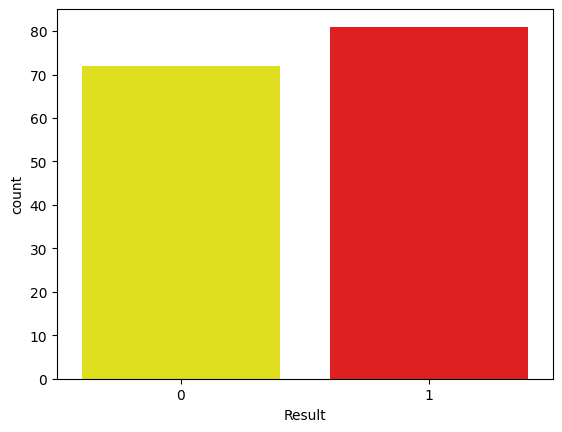

In [12]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

#불균형 데이터셋

In [13]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

array([[<Axes: xlabel='Solar.R', ylabel='Solar.R'>,
        <Axes: xlabel='Wind', ylabel='Solar.R'>,
        <Axes: xlabel='Temp', ylabel='Solar.R'>],
       [<Axes: xlabel='Solar.R', ylabel='Wind'>,
        <Axes: xlabel='Wind', ylabel='Wind'>,
        <Axes: xlabel='Temp', ylabel='Wind'>],
       [<Axes: xlabel='Solar.R', ylabel='Temp'>,
        <Axes: xlabel='Wind', ylabel='Temp'>,
        <Axes: xlabel='Temp', ylabel='Temp'>]], dtype=object)

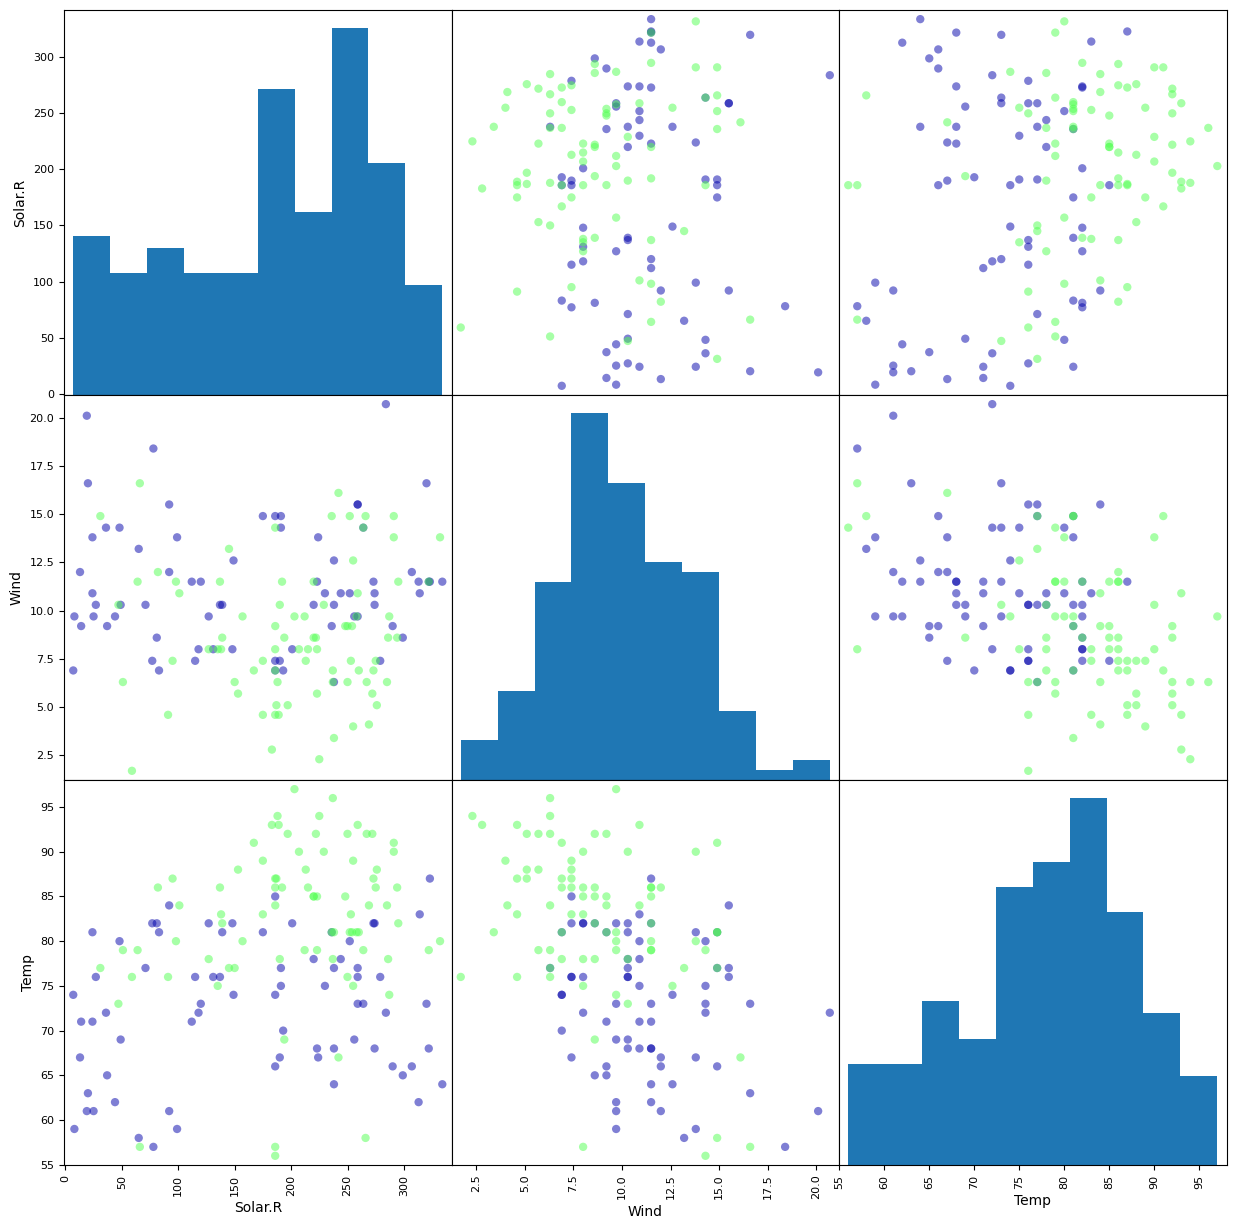

In [14]:
import mglearn

#산점도 행렬 출력

pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [15]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp.Result.value_counts()

0    72
1    72
Name: Result, dtype: int64

In [16]:
X = X_samp[cols]

y = y_samp['Result']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

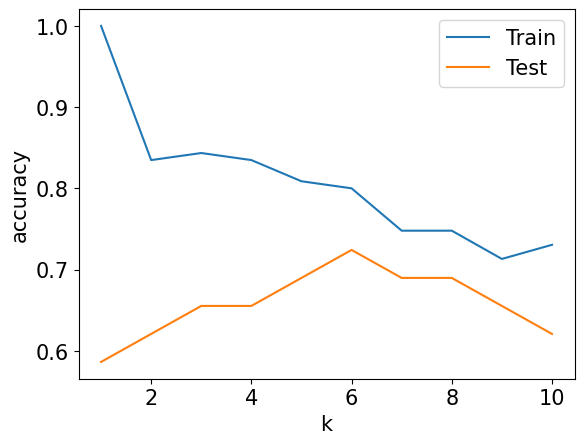

In [18]:
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

train_rate = []

test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.

# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함

# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1, 11)

for n in neighbors:

    # 모델 생성

    knn = KNeighborsClassifier(n_neighbors=n)


X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp.Result.value_counts()

#########################################################

X = X_samp[cols]

y = y_samp['Result']

#########################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#########################################################

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

train_rate = []

test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.

# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함

# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1, 11)

for n in neighbors:

    # 모델 생성

    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)

    # 학습용 데이터셋의 정확도

    train_rate.append(knn.score(X_train, y_train))

    # 검증용 데이터셋의 정확도

    test_rate.append(knn.score(X_test, y_test))

plt.rcParams["font.size"]=15

plt.plot(neighbors, train_rate, label="Train")

plt.plot(neighbors, test_rate, label="Test")

plt.ylabel("accuracy")

plt.xlabel("k")

plt.legend()

In [19]:
import numpy as np 

max_rate=max(test_rate)

idx=np.argmax(test_rate)

print('최적의 k:',idx+1)

#학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측

#이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

최적의 k: 6


In [20]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.808695652173913
검증용: 0.6896551724137931


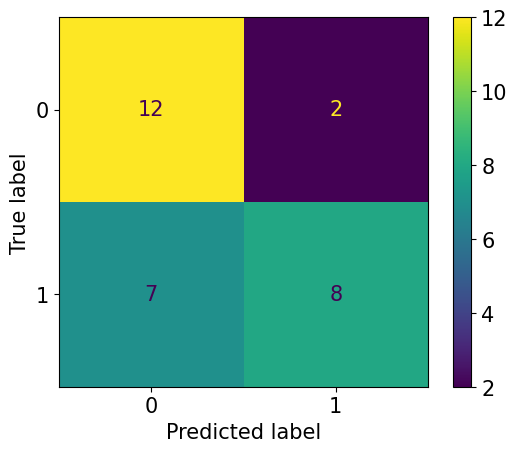

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred), display_labels=model.classes_).plot()

